<font size = 8><b> MEL-SPECTROGRAMS </font></b>

Advantage: perceptually relevant frequency representation.
Mel-scale: perceptually informed scale for pitch.

PROCESS:

1. Extract STFT
2. Convert amplitude to dBs
3. Convert frequency to Mel-scale
    a. Choose number of Mel bands
        i. The number of bands depends on the problem
        
    b. Construct Mel filters
        i. Convert lowest/highest frequency to Mel m = 2595 * log (1+(f/500))
        ii. Create the number of bands as equaly spaced points between the lowest and the highest Mel Frequency
        iii. Convert the chosen points back to Hertz. f = 700 * (10 ** (m/2595) - 1). This points are the center
             of each Mel band
        iv. Round these points to the nearest frequency bin
        v. Create triangular filters
           - Lower and higher end of the filter are the center of the previous Mel band
           - Mel filter band´s shape: two dimensional array (#bands, framesize/2 + 1)
           
    c. Apply Mel filter banks to spectrogram
        M = (#bands, framesize/2 + 1) (Mel Spectrogram)
        Y = (framesize/2+1, frames) (Normal Spectrogram)
        - Since the two shapes share one part of data, matrix multiplication can be applied
        - Mel Spectrogram = MY (matrix multiplication) array (#bands, #frames)

In [1]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import os

In [2]:
# load file

debussy_file = 'Audio/debussy.wav'
redhot_file = "Audio/redhot.wav"

In [3]:
ipd.Audio(debussy_file)

In [4]:
debussy, sr = librosa.load(debussy_file)
redhot, sr = librosa.load(redhot_file)

In [5]:
debussy.shape

(661500,)

<font size = 4><b> BUILDING THE FILTERS WITH LIBROSA </font></b>

In [6]:
filter_banks = librosa.filters.mel (sr = 22050, n_fft = 2048, n_mels=10)

In [7]:
filter_banks.shape # two dimensional array (#bands, framesize/2 + 1)

(10, 1025)

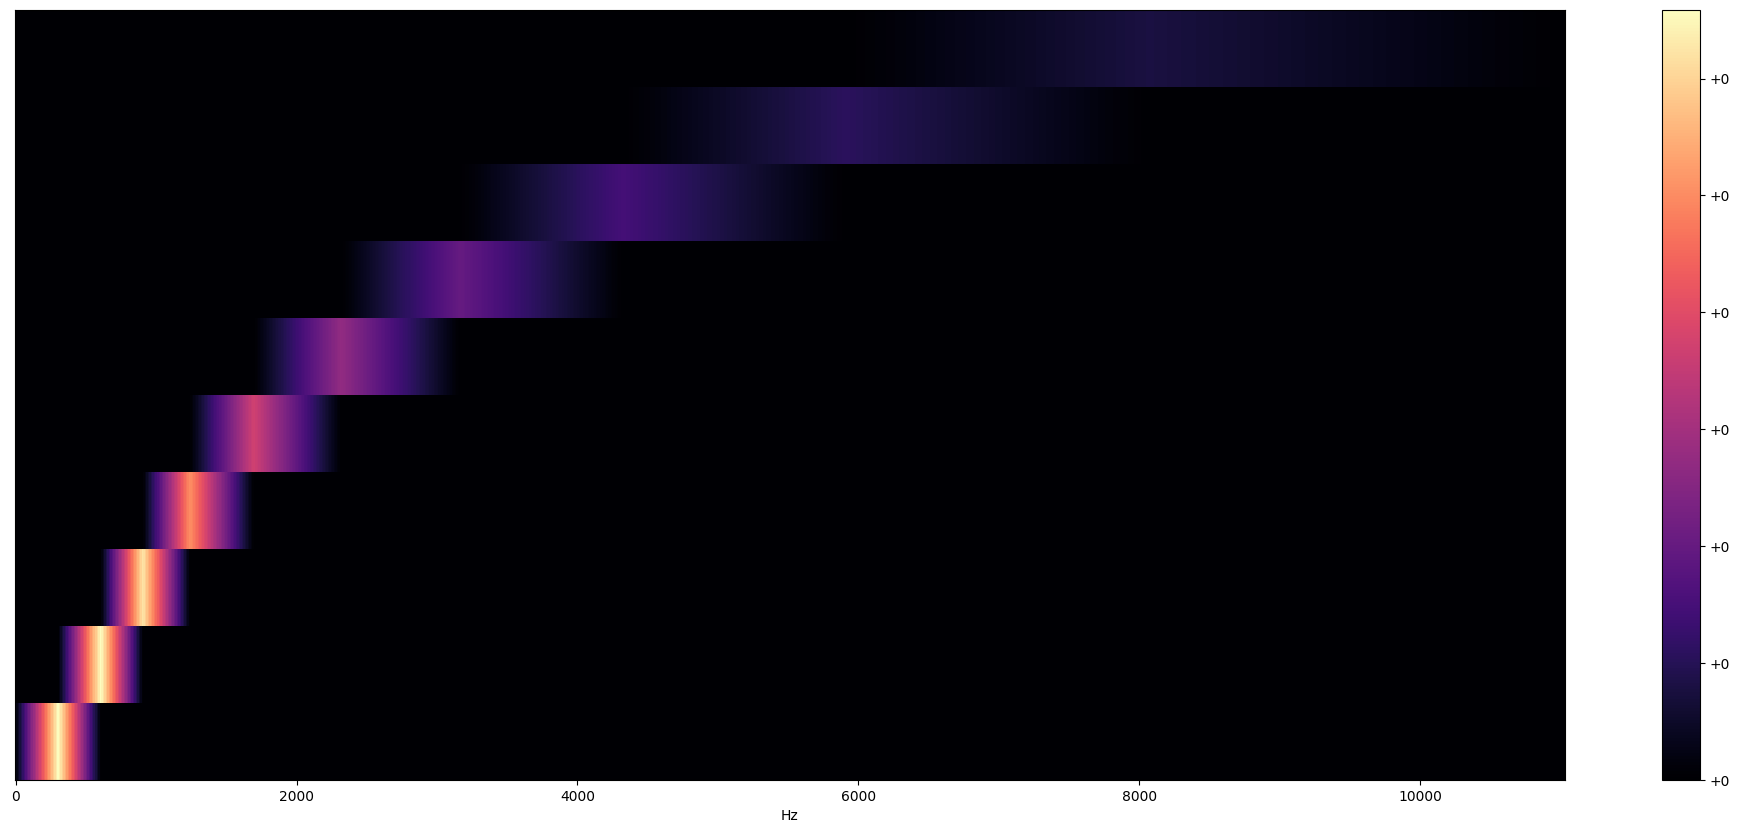

In [8]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks, #specshow works for any type of bidimensional array or matrix
                        sr = 22050,
                        x_axis = 'linear',
                        )
plt.colorbar(format = "%+2.f")
plt.show()

<font size = 4><b> PLOTING THE MEL SPECTROGRAM </font></b>

In [9]:
mel_spectrogram = librosa.feature.melspectrogram(y=debussy, sr=sr, n_mels=90) # ou need the y = debussy
mel_spectrogram2 = librosa.feature.melspectrogram(y=redhot, sr=sr, n_mels=90)

In [10]:
mel_spectrogram.shape

(90, 1292)

In [11]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram) # amplitude to dB
log_mel_spectrogram2 = librosa.power_to_db(mel_spectrogram2) # amplitude to dB

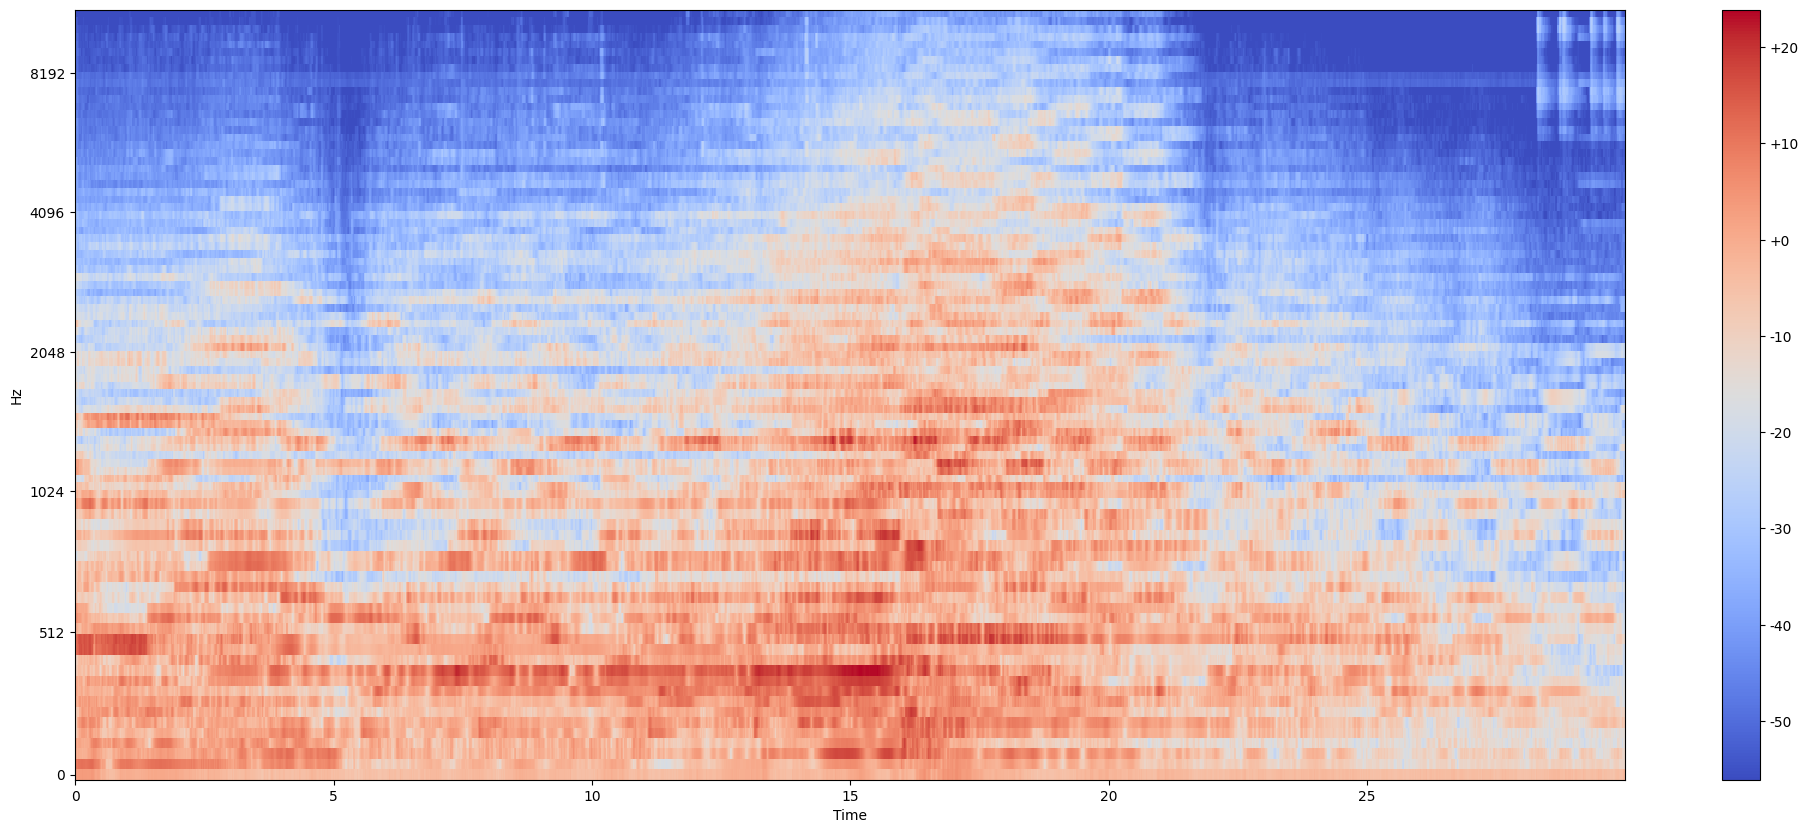

In [12]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                        sr = 22050,
                        x_axis = 'time',
                        y_axis = 'mel', # show frequencies according to Mel scale
                        )
plt.colorbar(format = "%+2.f")
plt.show()

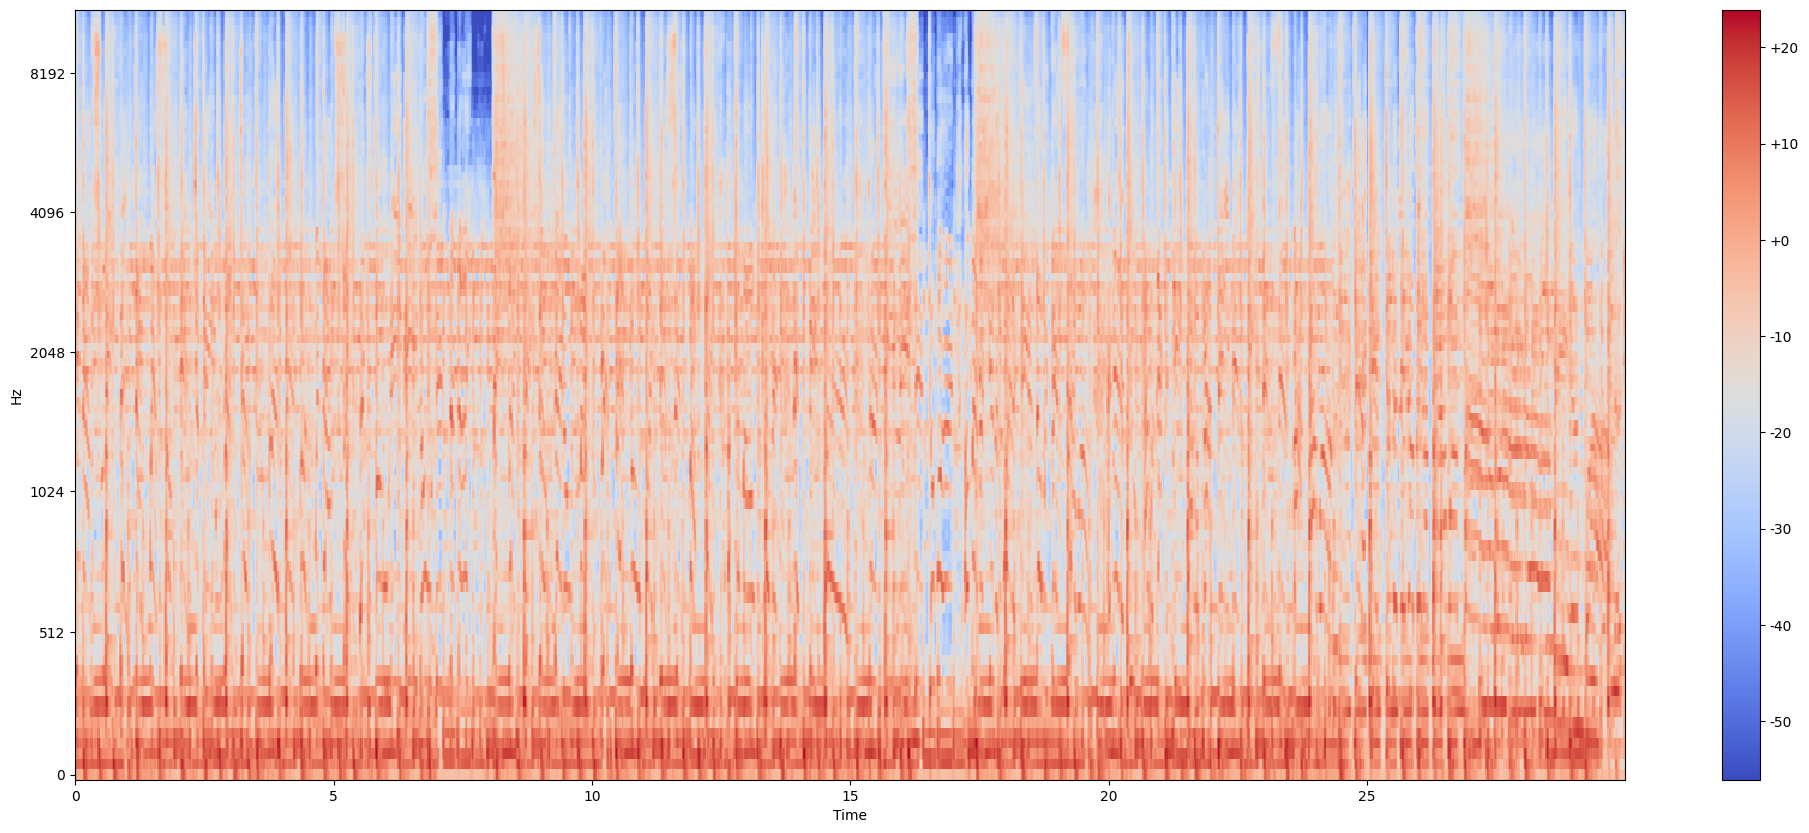

In [13]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram2,
                        sr = 22050,
                        x_axis = 'time',
                        y_axis = 'mel', # show frequencies according to Mel scale
                        )
plt.colorbar(format = "%+2.f")
plt.show()

<font size = 8><b> MFCC SPECTROGRAMS </font></b>



In [14]:
mfcc_spectrogram = librosa.feature.mfcc(y=debussy, sr=sr, n_mfcc=13) # 13 first, the other 13 and 13 come from delta
mfcc_spectrogram2 = librosa.feature.mfcc(y=redhot, sr=sr, n_mfcc=13)

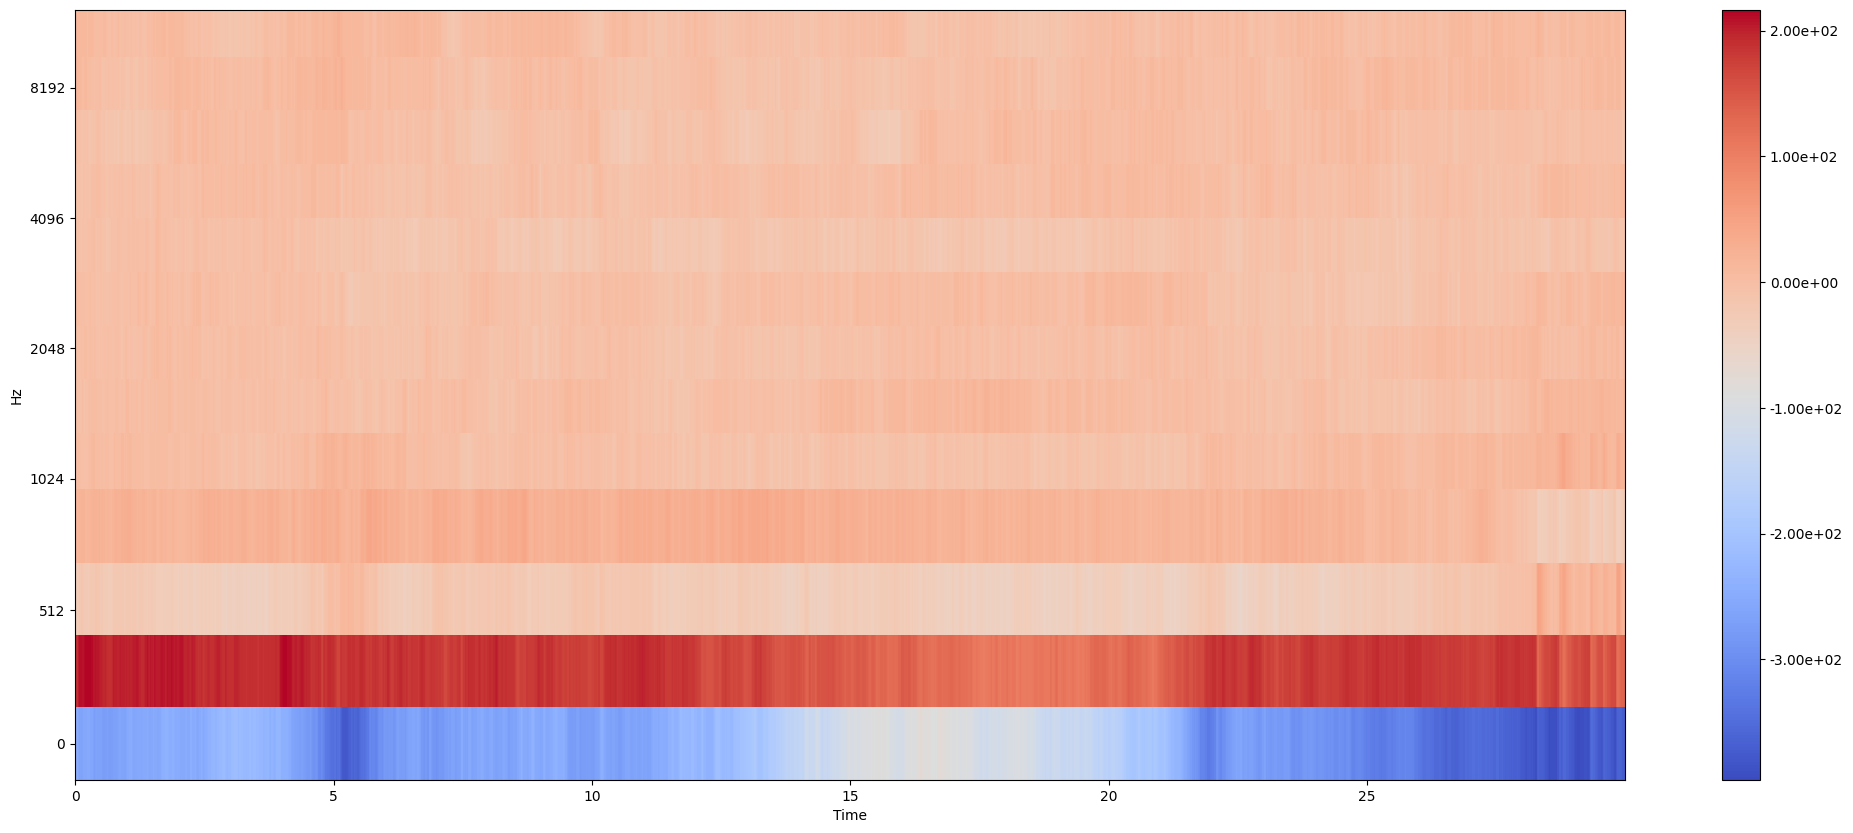

In [15]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc_spectrogram,
                        sr = 22050,
                        x_axis = 'time',
                        y_axis = 'mel',
                        )
plt.colorbar(format = "%4.2e")
plt.show()

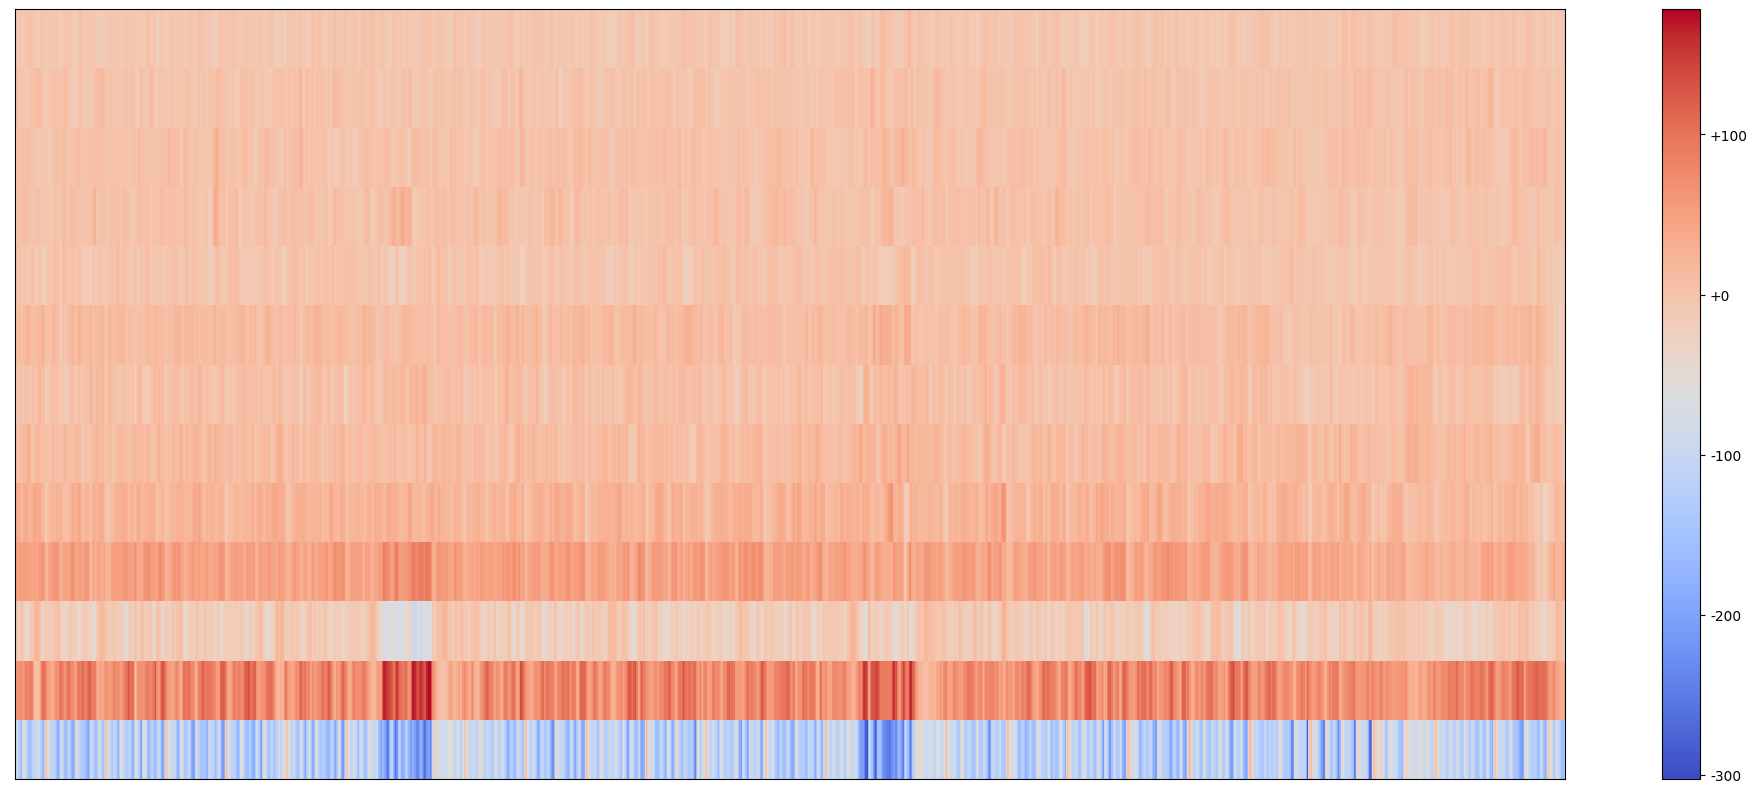

In [16]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc_spectrogram2,
                        sr = 22050,
                        #x_axis = 'time',
                        #y_axis = 'mel',
                        )
plt.colorbar(format = "%+2.f")
plt.show()

In [17]:
mfcc_spectrogram.shape #13 rows, 1292 columns

(13, 1292)

In [18]:
# extracting the first and second derivatives of the mfccs
# this shows how the mfcc change over time

delta_mfcc = librosa.feature.delta(mfcc_spectrogram)
delta2_mfcc = librosa.feature.delta(mfcc_spectrogram, order = 2)

In [19]:
delta2_mfcc.shape

(13, 1292)

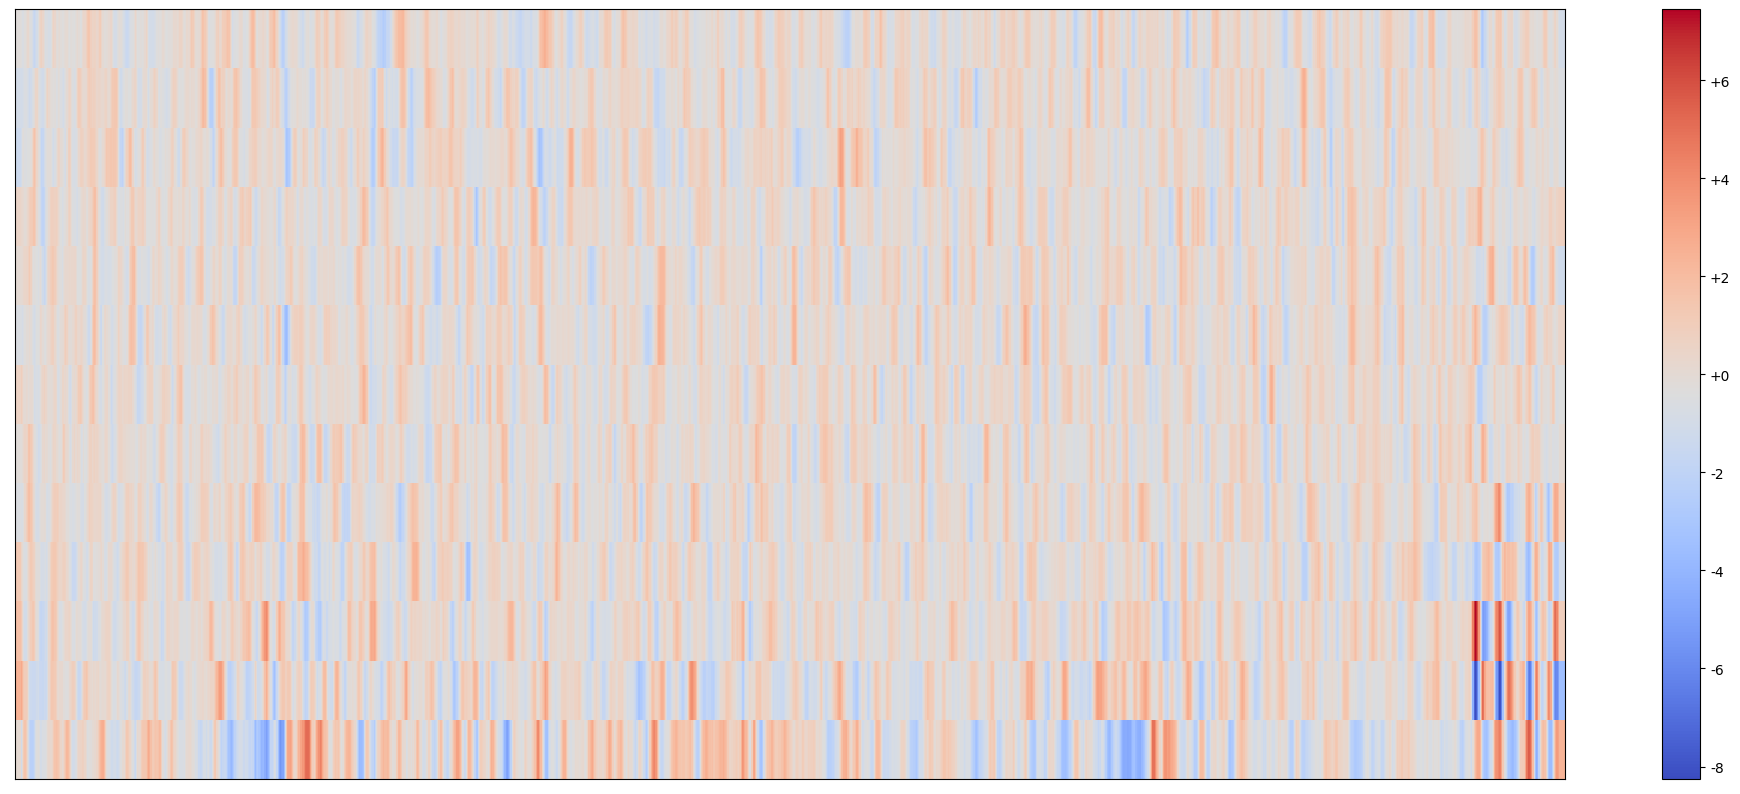

In [20]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc,
                        sr = 22050,
                        #x_axis = 'time',
                        #y_axis = 'mel',
                        )
plt.colorbar(format = "%+2.f")
plt.show()

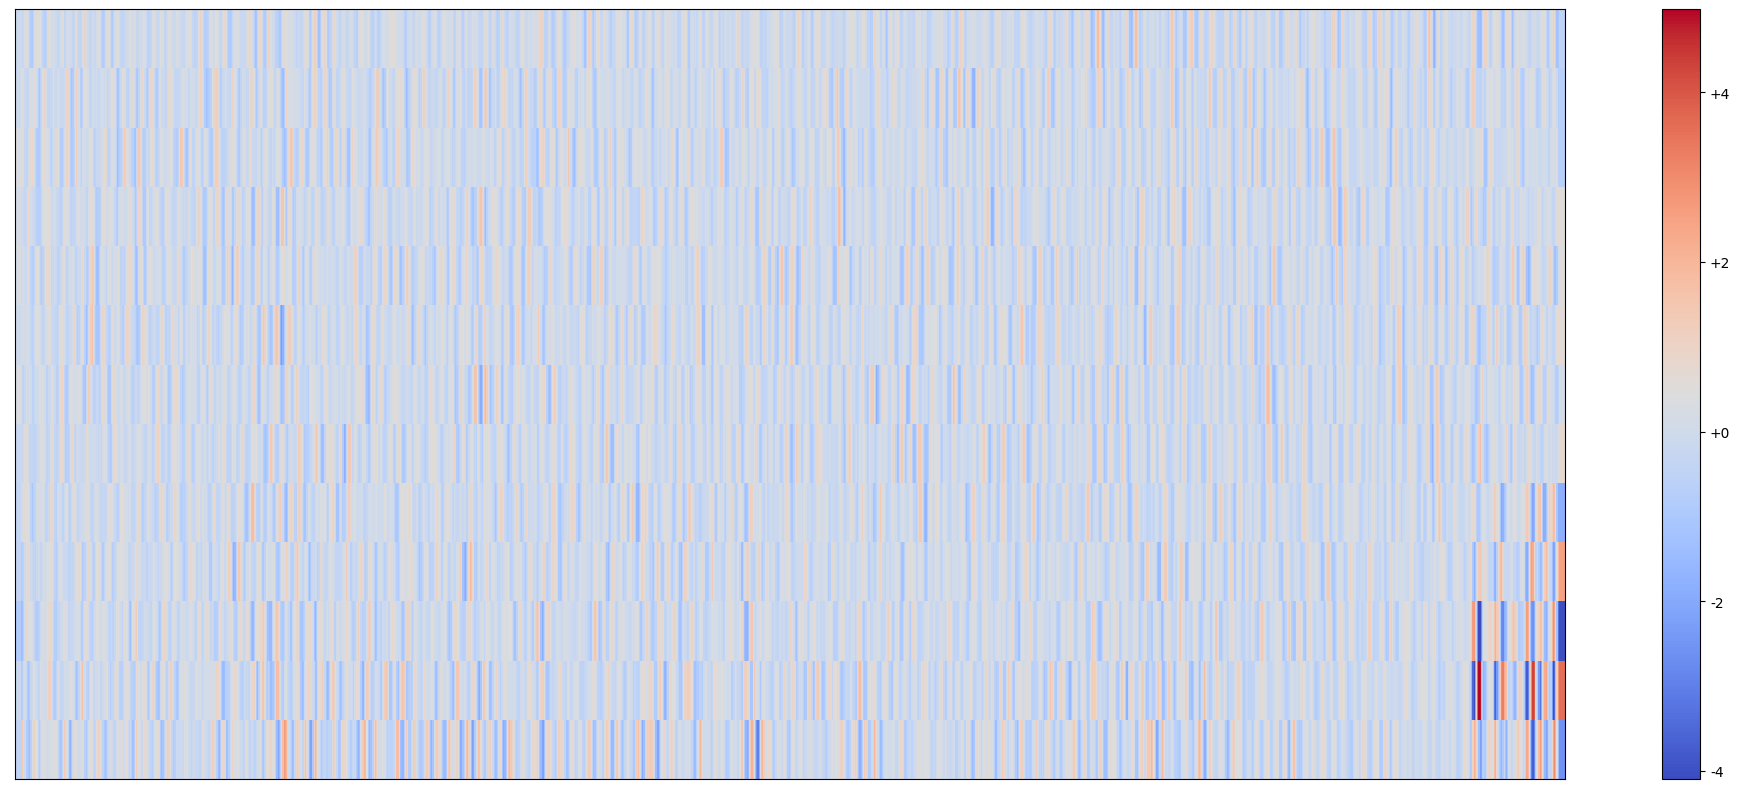

In [21]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfcc,
                        sr = 22050,
                        #x_axis = 'time',
                        #y_axis = 'mel',
                        )
plt.colorbar(format = "%+2.f")
plt.show()

In [22]:
# concatenating mfcc, delta and delta 2
mfccs_concatenate = np.concatenate((mfcc_spectrogram, delta_mfcc, delta2_mfcc))
mfccs_concatenate.shape

(39, 1292)

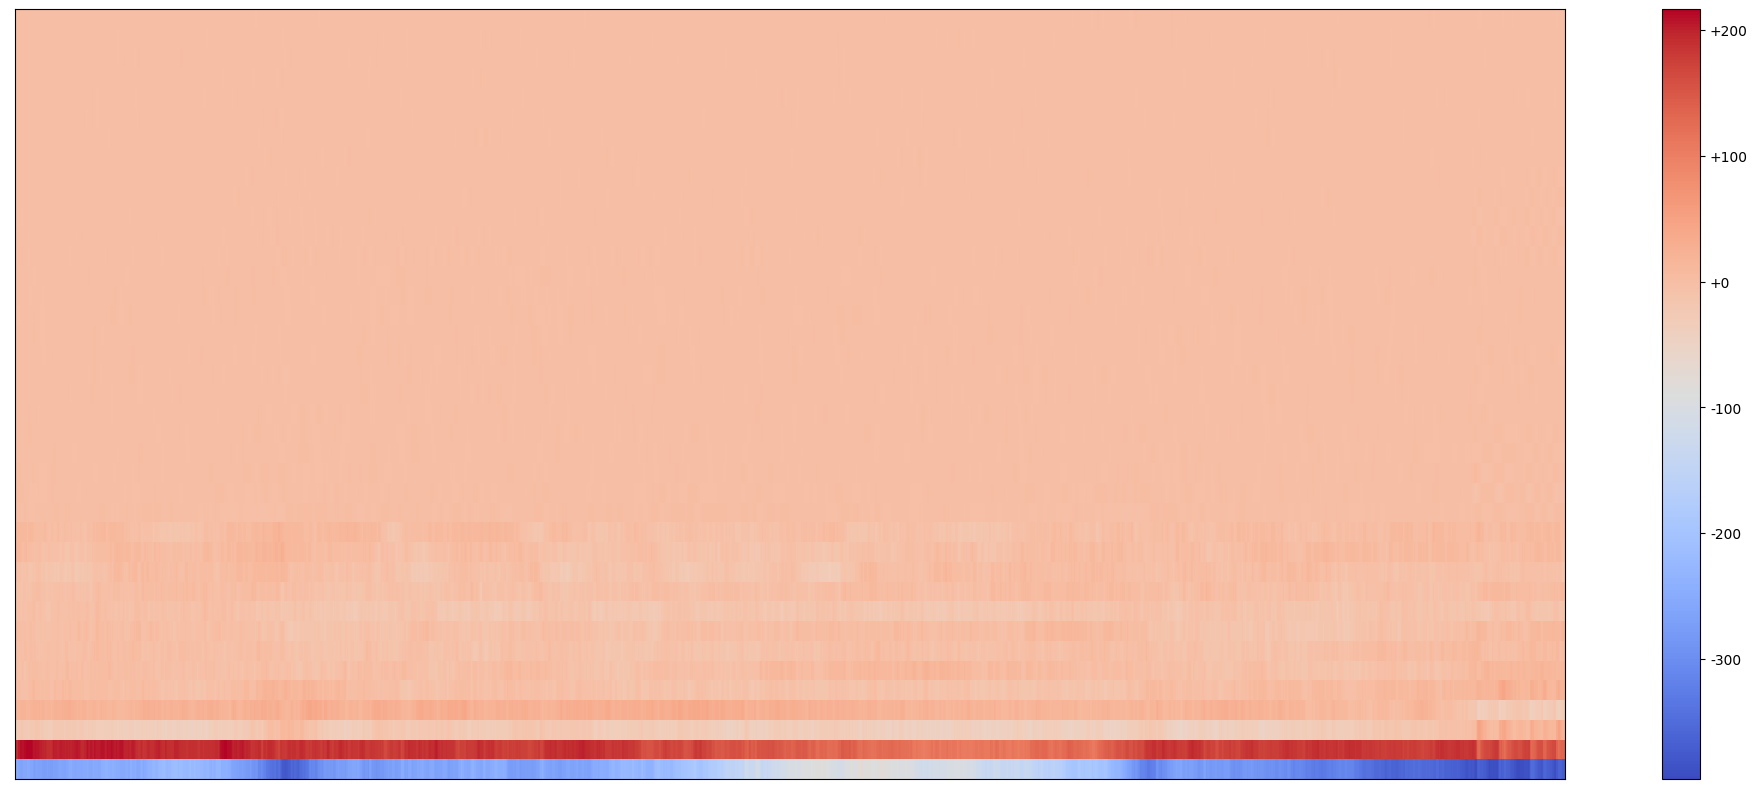

In [23]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs_concatenate,
                        sr = 22050,
                        #x_axis = 'time',
                        #y_axis = 'mel',
                        )
plt.colorbar(format = "%+2.f")
plt.show()